In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

# Merge with store information
df = train.merge(store, on="Store", how="left")

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["Day"] = df.Date.dt.day
df["WeekOfYear"] = df.Date.dt.isocalendar().week


In [9]:
df = df[df["Open"] == 1].copy()
df = df[df["Sales"] > 0].copy()


In [10]:
df["CompetitionDistance"].fillna(df["CompetitionDistance"].median(), inplace=True)

df["CompetitionOpenSinceMonth"].fillna(0, inplace=True)
df["CompetitionOpenSinceYear"].fillna(0, inplace=True)

df["Promo2SinceWeek"].fillna(0, inplace=True)
df["Promo2SinceYear"].fillna(0, inplace=True)
df["PromoInterval"].fillna(0, inplace=True)


In [11]:
df["CompetitionOpen"] = 12 * (df["Year"] - df["CompetitionOpenSinceYear"]) + \
                         (df["Month"] - df["CompetitionOpenSinceMonth"])
df["CompetitionOpen"] = df["CompetitionOpen"].apply(lambda x: x if x > 0 else 0)


In [12]:
df["Promo2Open"] = 12 * (df["Year"] - df["Promo2SinceYear"]) + \
                   ((df["WeekOfYear"] - df["Promo2SinceWeek"]) * 7 / 30.5)
df["Promo2Open"] = df["Promo2Open"].apply(lambda x: x if x > 0 else 0)
df["Promo2Open"] = df["Promo2Open"] * df["Promo2"]


In [13]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
             7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

def is_promo2_month(row):
    if row["Promo2"] == 0:
        return 0
    interval = str(row["PromoInterval"]).split(",")
    current = month_map[row["Month"]]
    return 1 if current in interval else 0

df["IsPromo2Month"] = df.apply(is_promo2_month, axis=1)


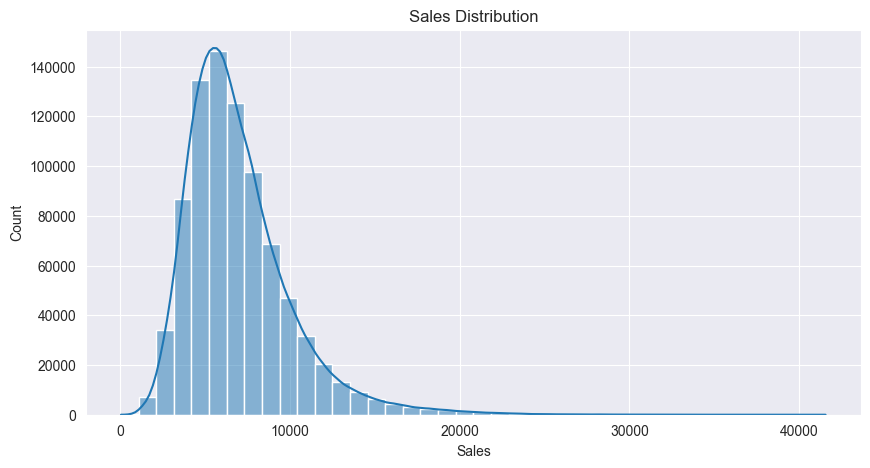

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df["Sales"], bins=40, kde=True)
plt.title("Sales Distribution")
plt.show()


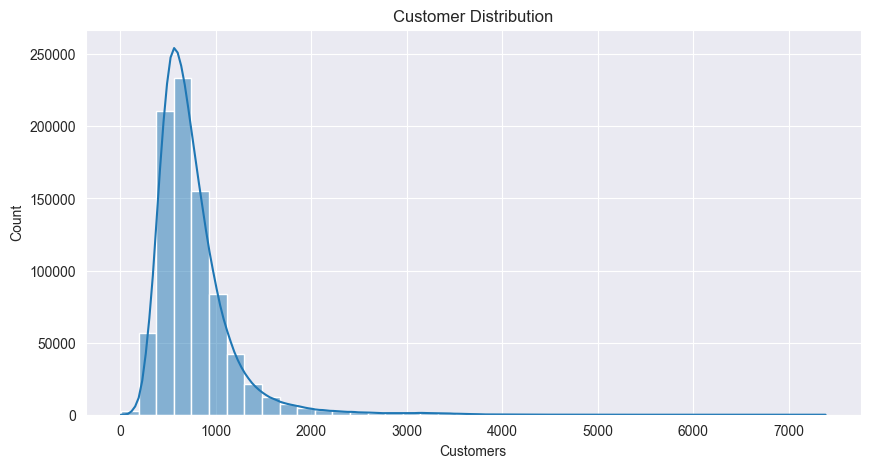

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df["Customers"], bins=40, kde=True)
plt.title("Customer Distribution")
plt.show()


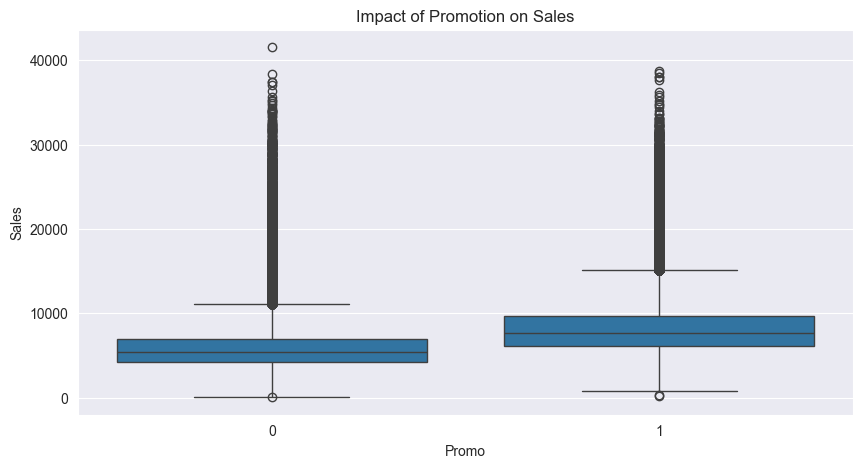

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Promo", y="Sales", data=df)
plt.title("Impact of Promotion on Sales")
plt.show()


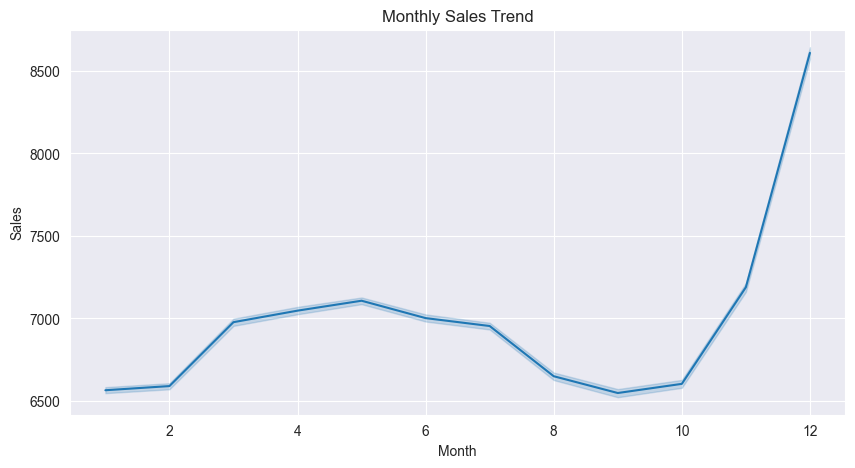

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="Sales", data=df)
plt.title("Monthly Sales Trend")
plt.show()


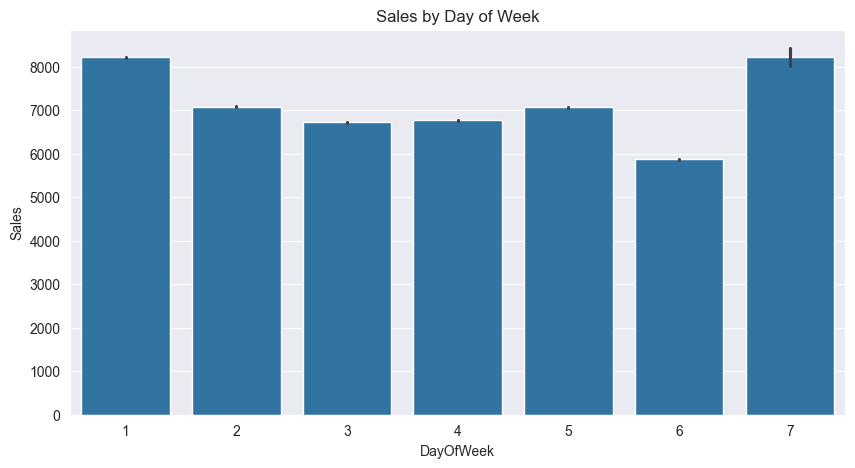

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x="DayOfWeek", y="Sales", data=df)
plt.title("Sales by Day of Week")
plt.show()


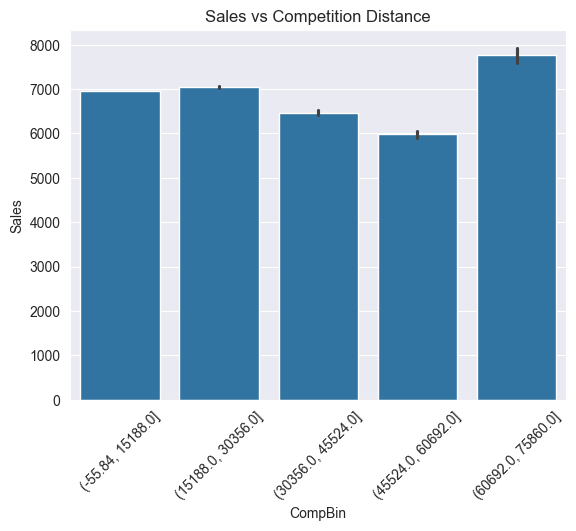

In [20]:
df["CompBin"] = pd.cut(df["CompetitionDistance"], bins=5)
sns.barplot(x="CompBin", y="Sales", data=df)
plt.xticks(rotation=45)
plt.title("Sales vs Competition Distance")
plt.show()


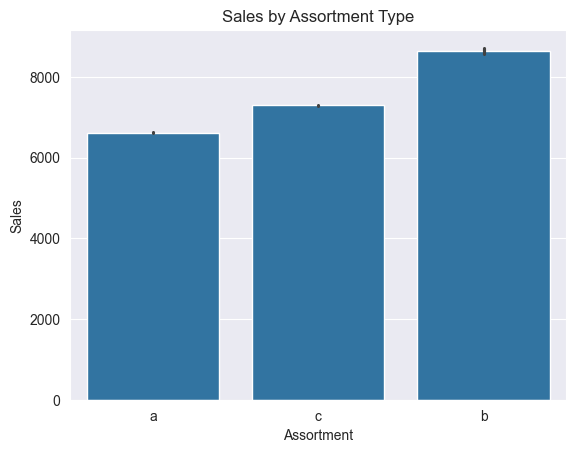

In [21]:
sns.barplot(x="Assortment", y="Sales", data=df)
plt.title("Sales by Assortment Type")
plt.show()


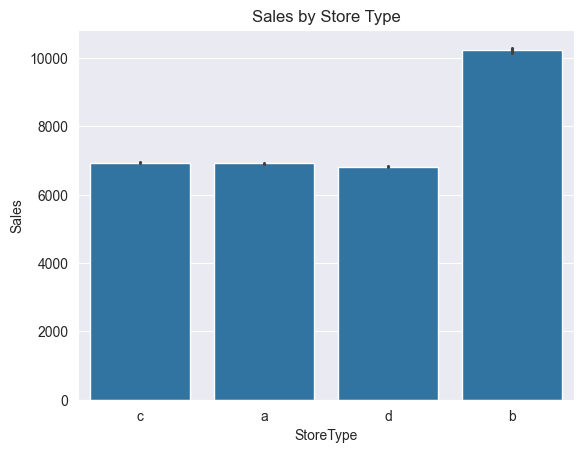

In [22]:
sns.barplot(x="StoreType", y="Sales", data=df)
plt.title("Sales by Store Type")
plt.show()


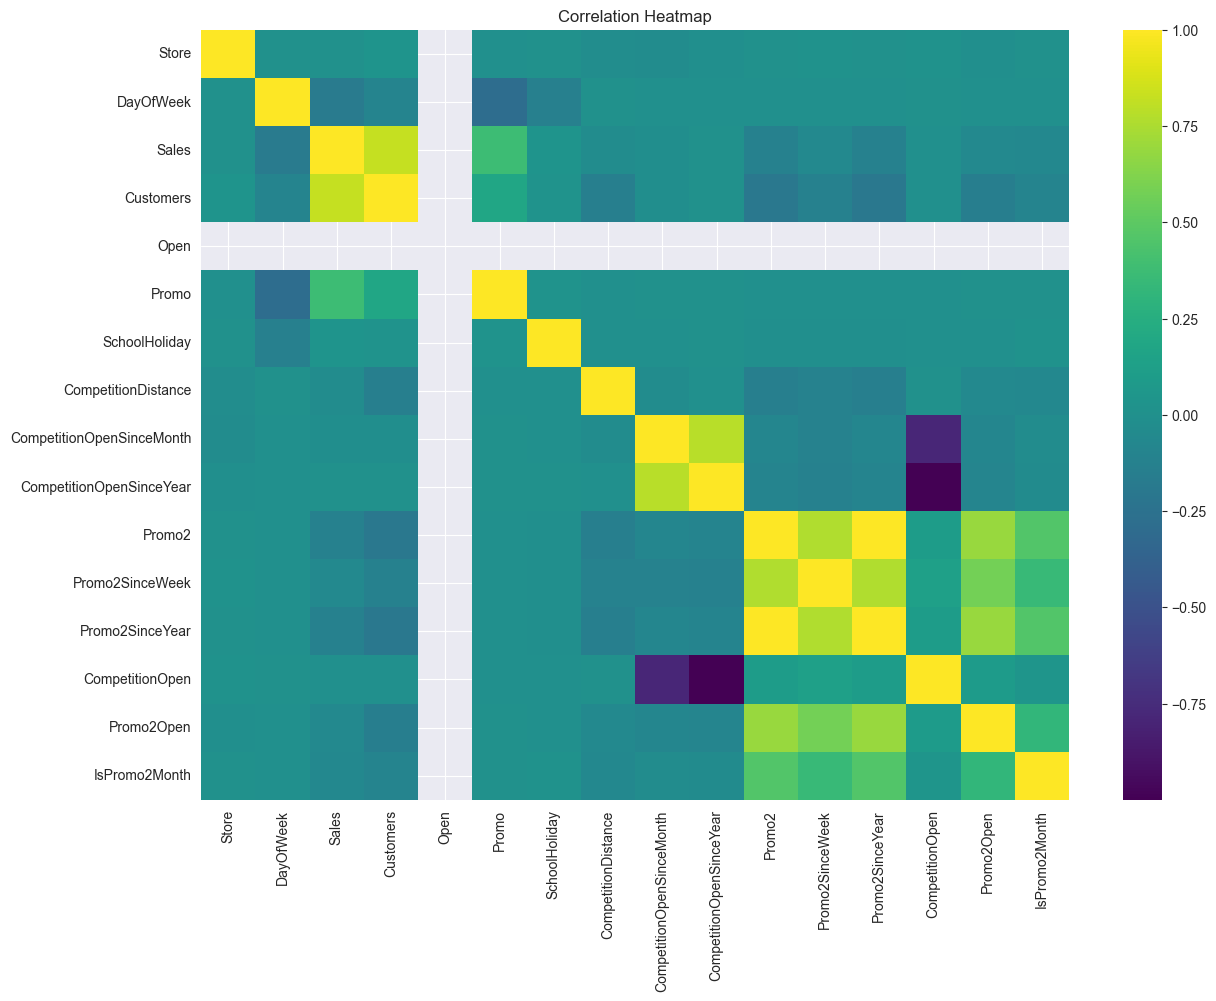

In [24]:
plt.figure(figsize=(14,10))

numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), cmap="viridis", annot=False)

plt.title("Correlation Heatmap")
plt.show()


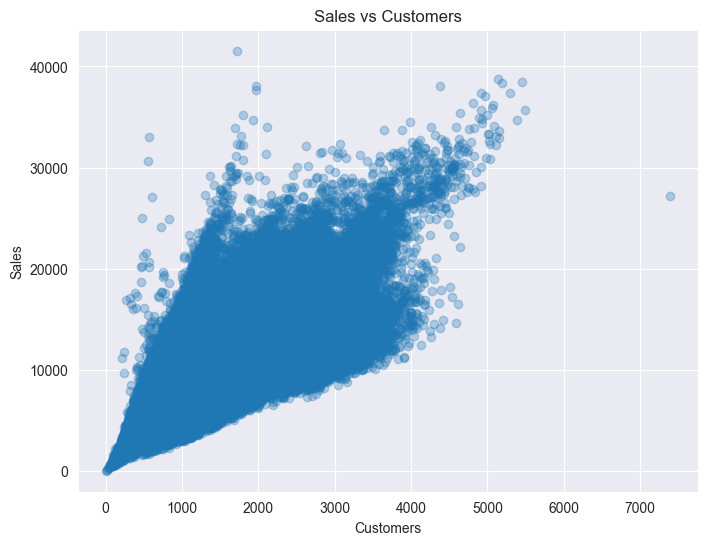

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(df["Customers"], df["Sales"], alpha=0.3)
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.title("Sales vs Customers")
plt.show()
